In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('data.csv', header=None)
df.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [25]:
df.shape

(100, 3)

In [27]:
df.rename(columns={"0":"x", "1":"y", "2":"label"}, inplace=True)

In [28]:
df.head()

,x,y,label
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [55]:
df['label'].value_counts()

label
1    50
0    50
Name: count, dtype: int64

# Define a random line that will act as a separator

y = x + b
We are trying to model the separator as a line assuming the data points are linearly separable.


In [46]:
b = [1, 1]

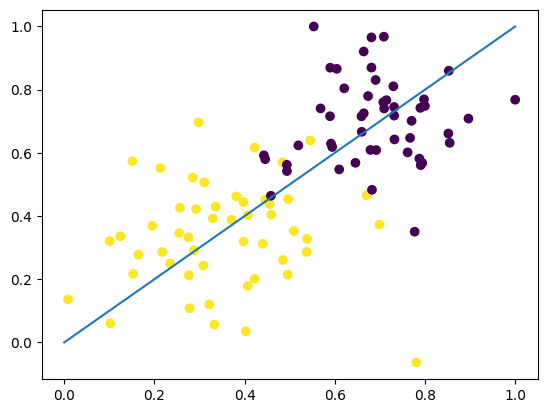

In [52]:
plt.scatter(df["x"], df["y"], c=df["label"])
plt.plot([0,1] + b, [0, 1] + b)
plt.show()

We can further extend the equation to include arbitrary number of `x` terms. Each of these `x` terms represent a neuron. 
y_pred = x1+x2+b
w1, w2 = random weights 

# Step function
Or a threshold function. Perceptron algorithm uses a threshold function to classify points based on direction of the data point from the threshold. If the point is greater thana certain threshold then it's classified as positive, else it's negative.

In [54]:
def step_function(prediction):
    return 1 if prediction >= 0 else 0


# Defining the prediction
Each prediction is an output of passing the values x and y pair to the approximating function and getting a prediction. In this case, the approximating function is the equation of a line and when we pass the points through it makes an affine transformation, applies a bias and passes the output through a threshold function.

In [110]:
def prediction(x, w, b):
    logit = np.sum(np.dot(w.T, x) + b)
    #print("logit", logit)
    y_pred = step_function(logit)
    return y_pred

The amount by which the line will move will be denoted by the weights, `w` vector. An by learning a separator, we essentially mean we are learning what linear combination of the line best separates the data. This combination is given by the weight vector. 

In [120]:
def perceptron_learning(X, y, w, b, learning_rate):
    for i, data in enumerate(X):
        y_pred = prediction(X[i], w[i], b)
        if y[i] - y_pred < 0:
            w[i] = w[i] - learning_rate * w[i]
            b -= learning_rate * b
        elif y[i] - y_pred > 0:
            w[i] = w[i] + learning_rate * w[i]
            b -= learning_rate * b
    return w[i], b


In [121]:
def train_perceptron(X, y, learning_rate, num_epochs):

    W = np.random.rand(X.shape[0])
    #print("X", W.T.shape)
    #print("X", X.size)
    b = np.random.rand()
    for i in range(num_epochs):
        print(f"epoch: {i}")
        W[i], b = perceptron_learning(X, y, W, b, learning_rate)
    return W, b
    

In [ ]:
train_perceptron(np.array(df['x'].tolist()), np.array(df['y'].tolist()), 0.01, 10)